# Neural Networks - Bank Loan Approvals

## Introduction

Artificial intelligence and machine learning have been transforming the banking industry in many aspects, such as automatic fraud detection, bank customers segmentation and automation of many processes. Particularly, when there is an application for credit, the bank evaluates whether the person or company is able to pay the loan plus interest in a certain time, for this they use measures of profitability, leverage and many other variables such as liquidity to calculate the risk, a complex task that can sometimes be inaccurate.

Machine Learning is capable of generating credit risk models based on financial data and the credit and consumption behavior of its customers. They can also identify when to increase or reduce a customer's credit line, gauging the bank's tolerance to risk.

## Objetive

Most bank customers are depositors and the bank would like to start targeting those customers who are worthy to issue personal loans and make revenue by charging them interests. Therefore, the bank would like to retain those depositors and convert them to personal loan customers and therefore growing aanual rvenue.

In this project we will assume that you work as a data scientist at the bank and the bank management team would like to build and train a deep neural network model to predict the likelihood off customers buying personal loans based on their features, such as their age, experience, income, family education and credit card information that can be able to predict the likelihood
off liability customers.

## Data

In this particular escenario the bank issue a marketing campaign in the past that resulted in 9% success rate and the managment team would like to analyze this campaing results to develope a model that targets customers who have high probability of obtaining a loan. The data set contains the following features:

* ID
* Age
* Professional Experience
* Annual Income
* Address ZIP Code
* Family Size
* Credit Card Average Spending
* Education Level
* Mortage
* Personal Loan
* Securities Account
* Deposit Certificate
* Use of Online Banking Facilities
* Credit Card

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.metrics import Accuracy
warnings.filterwarnings('ignore')

df = pd.read_csv('Bank_Loans.csv')
print(df.shape)
df.head()

(5000, 14)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Exploratory Data Analysis

First we have to understand our data by getting a general summary of it and some statistics. We also want to calculate  the percentage of people that have credit cards and the percentage of people that accepted a loan.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [5]:
credit_card = df[df['CreditCard'] == 1]
a = len(credit_card)
b = len(df)
percent = a/b * 100
print('Customer percentage that have credit cards: ', percent,'%')

accepted = df[df['Personal Loan'] == 1]
c= len(accepted)
percentt = c/b * 100
print('Percentage of Customers who accepted the personal loan offer = ', percentt,'%')

Customer percentage that have credit cards:  29.4 %
Percentage of Customers who accepted the personal loan offer =  9.6 %


We are interested in knowing more the bank clients so we are going to build some visualizations of the distribution of certain features to have a better understanding.

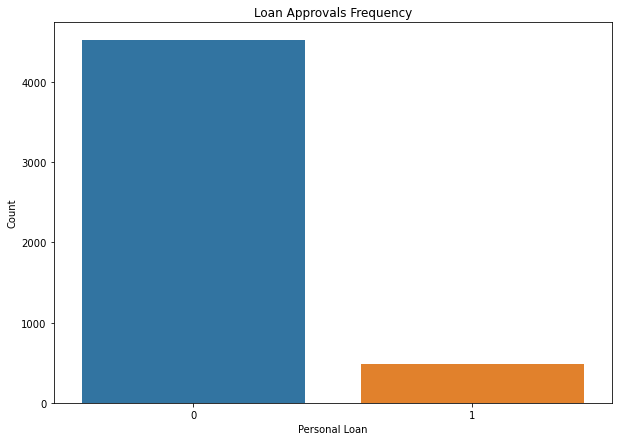

In [7]:
plt.figure(figsize = (10, 7))
sns.countplot(df['Personal Loan'])
plt.title('Loan Approvals Frequency')
plt.xlabel('Personal Loan')
plt.ylabel('Count');

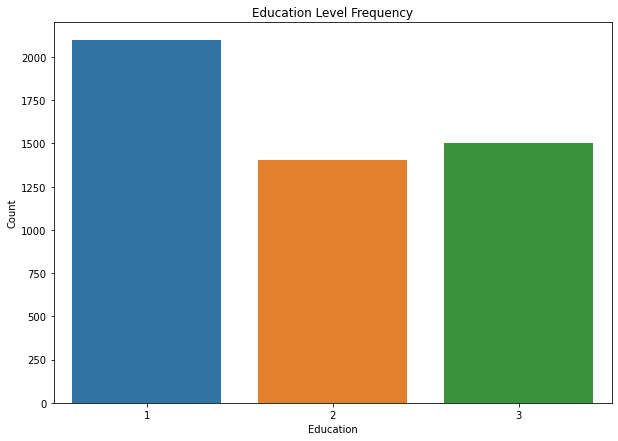

In [8]:
plt.figure(figsize = (10, 7))
sns.countplot(df['Education'])
plt.title('Education Level Frequency')
plt.xlabel('Education')
plt.ylabel('Count');

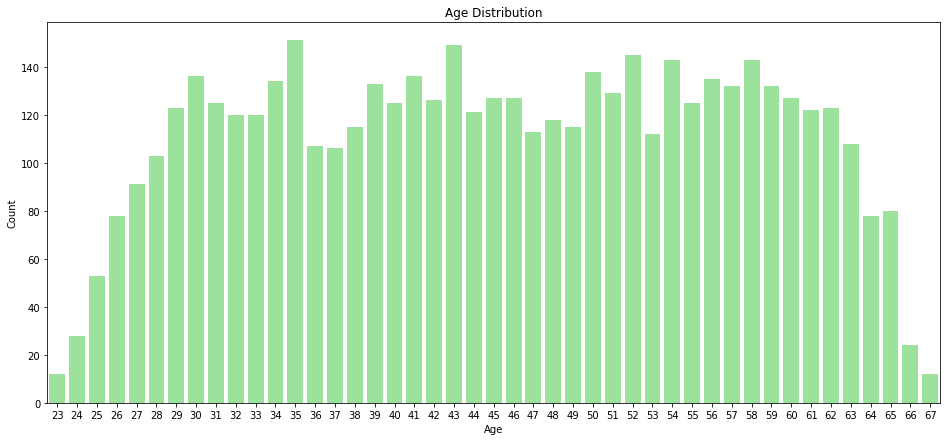

In [9]:
plt.figure(figsize = (16, 7))
sns.countplot(df['Age'], color='lightgreen')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count');

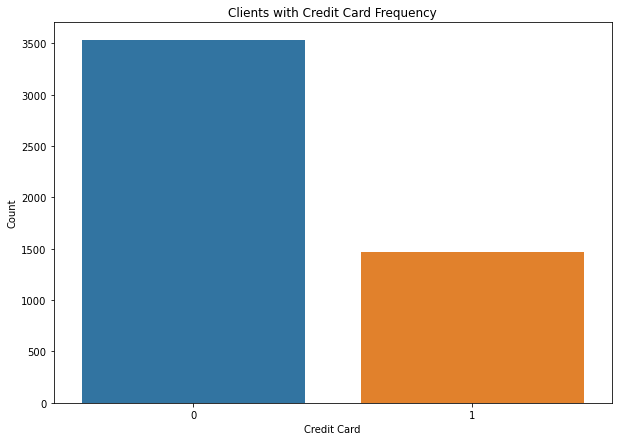

In [10]:
plt.figure(figsize = (10, 7))
sns.countplot(df['CreditCard'])
plt.title('Clients with Credit Card Frequency')
plt.xlabel('Credit Card')
plt.ylabel('Count');

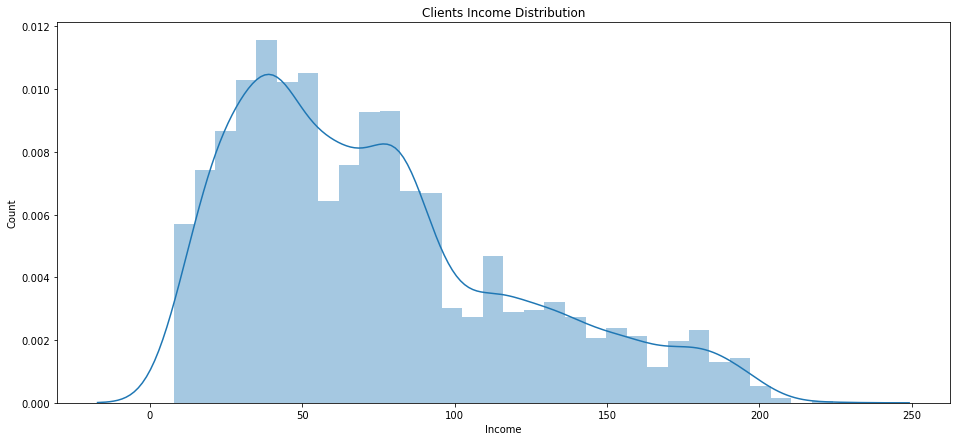

In [14]:
plt.figure(figsize = (16, 7))
sns.distplot(df['Income'])
plt.title('Clients Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count');

We want to get insigths about the difference about people who accepte a loan and people who didn´t by dividing our dataset and cheack out for the statistics of the two groups. This will tell us what factors are the most decisives when clients want to get a loan. 

In [15]:
loans = df[df['Personal Loan'] == 1]
no_loans = df[df['Personal Loan'] == 0]

In [16]:
loans.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,480.0,2390.650000,1394.393674,10.0,1166.50,2342.0,3566.0000,4981.0
Age,480.0,45.066667,11.590964,26.0,35.00,45.0,55.0000,65.0
Experience,480.0,19.843750,11.582443,0.0,9.00,20.0,30.0000,41.0
Income,480.0,144.745833,31.584429,60.0,122.00,142.5,172.0000,203.0
ZIP Code,480.0,93153.202083,1759.223753,90016.0,91908.75,93407.0,94705.5000,96008.0
Family,480.0,2.612500,1.115393,1.0,2.00,3.0,4.0000,4.0
CCAvg,480.0,3.905354,2.097681,0.0,2.60,3.8,5.3475,10.0
Education,480.0,2.233333,0.753373,1.0,2.00,2.0,3.0000,3.0
Mortgage,480.0,100.845833,160.847862,0.0,0.00,0.0,192.5000,617.0
Personal Loan,480.0,1.000000,0.000000,1.0,1.00,1.0,1.0000,1.0


In [17]:
no_loans.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4520.0,2512.165487,1448.299331,1.0,1259.75,2518.5,3768.25,5000.0
Age,4520.0,45.367257,11.450427,23.0,35.00,45.0,55.00,67.0
Experience,4520.0,20.132301,11.456672,-3.0,10.00,20.0,30.00,43.0
Income,4520.0,66.237389,40.578534,8.0,35.00,59.0,84.00,224.0
ZIP Code,4520.0,93152.428761,2156.949654,9307.0,91911.00,93437.0,94608.00,96651.0
Family,4520.0,2.373451,1.148771,1.0,1.00,2.0,3.00,4.0
CCAvg,4520.0,1.729009,1.567647,0.0,0.60,1.4,2.30,8.8
Education,4520.0,1.843584,0.839975,1.0,1.00,2.0,3.00,3.0
Mortgage,4520.0,51.789381,92.038931,0.0,0.00,0.0,98.00,635.0
Personal Loan,4520.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


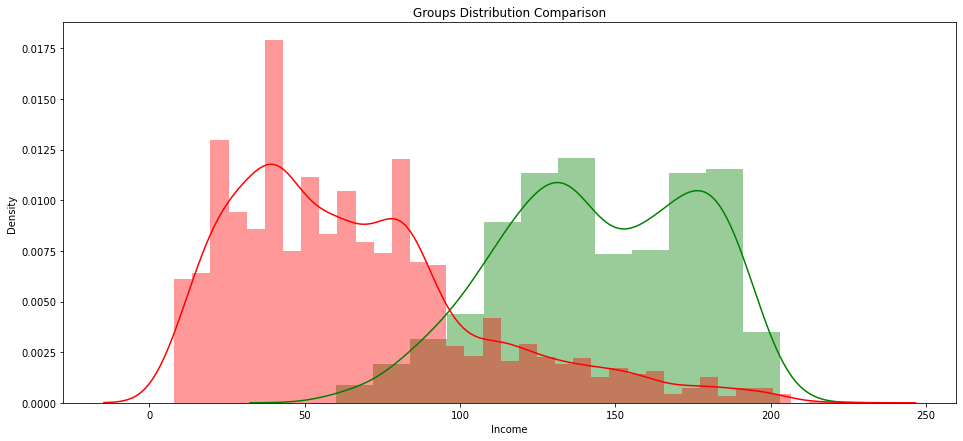

In [18]:
plt.figure(figsize = (16, 7))
sns.distplot(loans['Income'], color= 'g')
sns.distplot(no_loans['Income'], color= 'r')
plt.title('Groups Distribution Comparison')
plt.xlabel('Income')
plt.ylabel('Density');

In the plot above, we are able to see the distribution plot for both data frames separately that gives us an idea off both groups of people. It seems that the people who have higher incomes tend to belong to the green group, which are people who have personal loans. They generally have higher average of around 150 k. On the other hand, the red group have an income of around 60 k. Therefore the bank usually denys the people with low household incomes bank loans, usually because these people are single. 

Next we are going generate a summary off all the scatter plots for all the different data that we have in the data frame and print out the correlations between our variables in a heatmap form.

<Figure size 2160x2160 with 0 Axes>

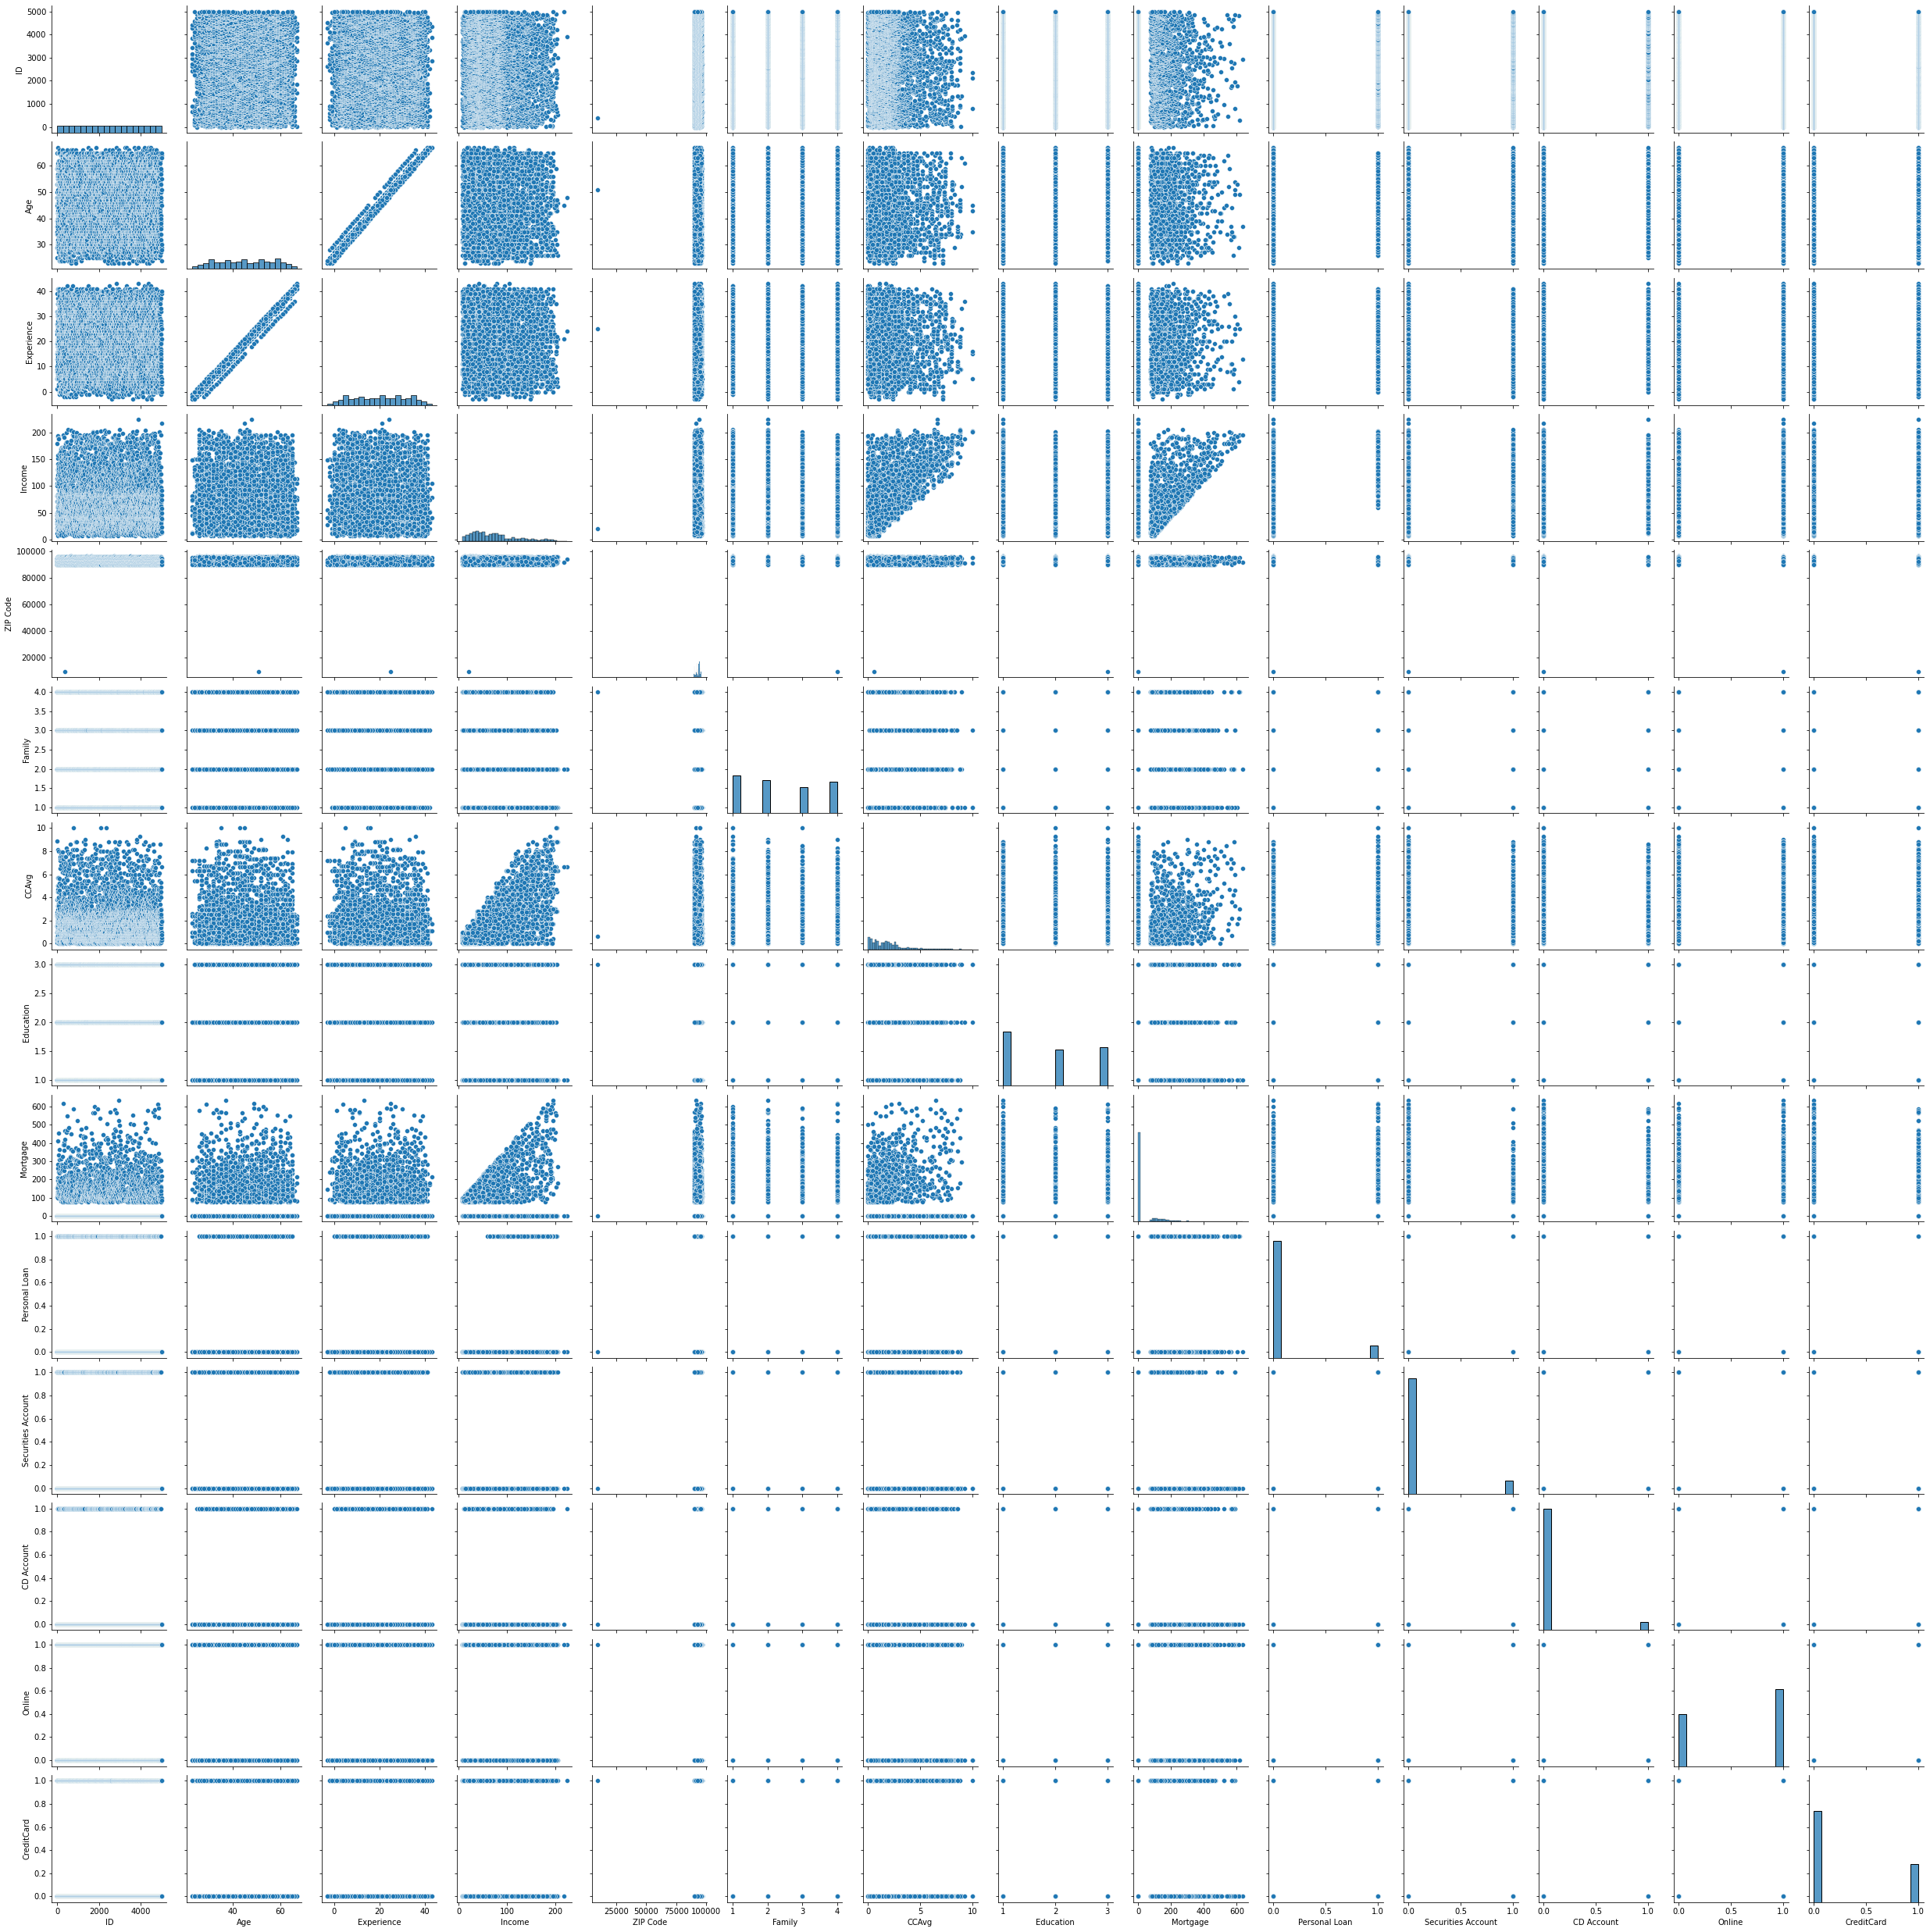

In [19]:
plt.figure(figsize = (30, 30))
sns.pairplot(df);

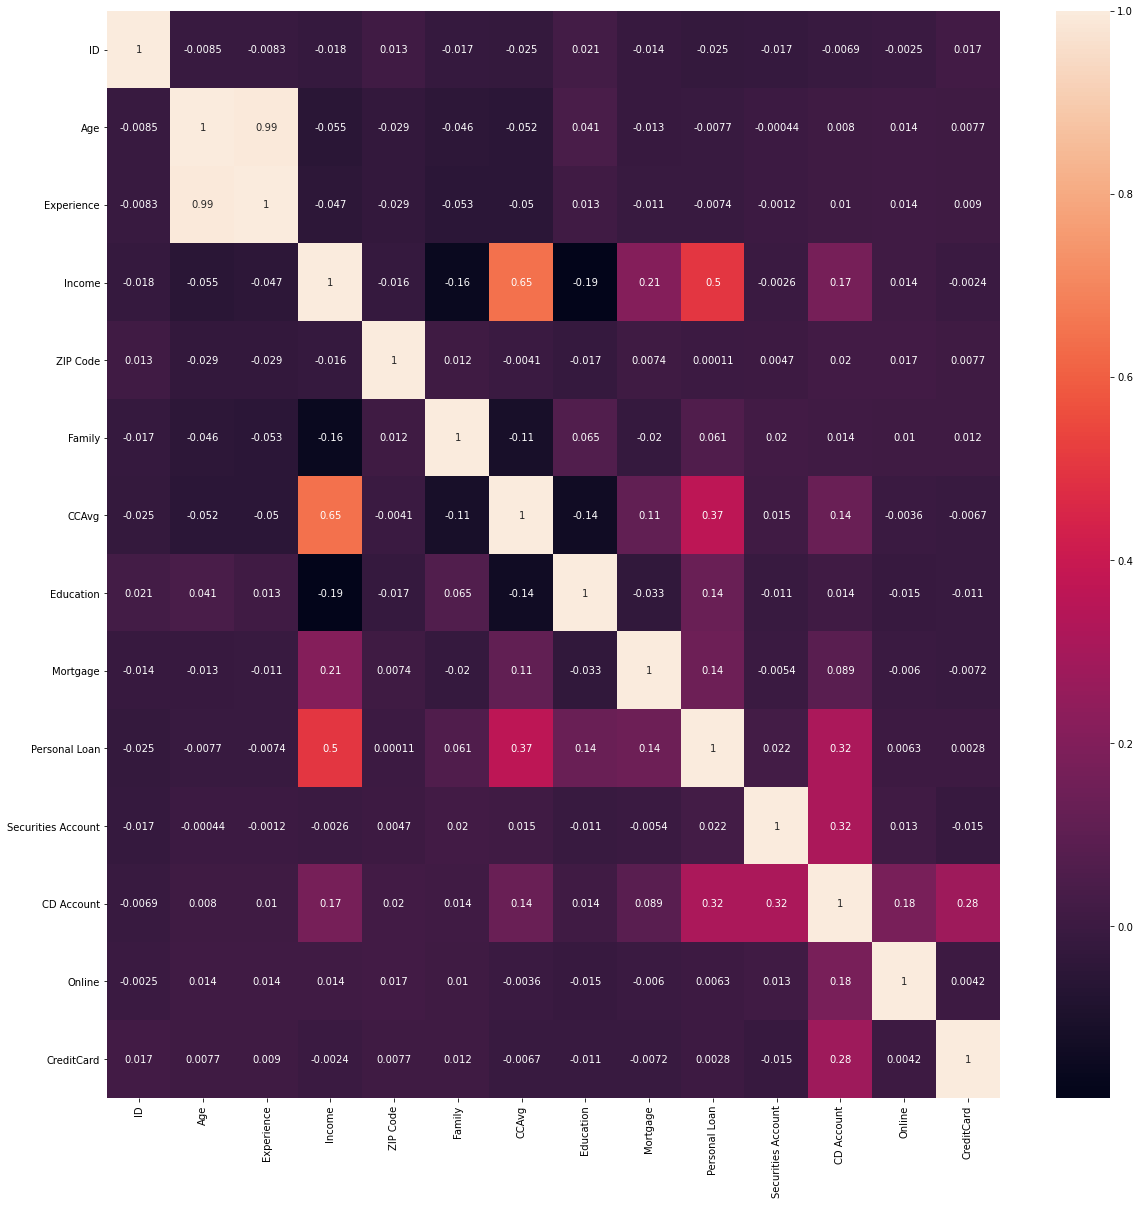

In [20]:
plt.figure(figsize = (20, 20))
correlation_m = df.corr()
sns.heatmap(correlation_m, annot=True);

As you may see in the corelation matrix above, there is a direct positive correlation between the level of experience or expertise off the customers and their age, which makes complete sense. Also, the positive correlation of around 0.65 between the average credit card spending and their income. It seems that people who have higher income tend to use the credit card way much more, and they also have higher average spending on their credit card as well. Lets go deeper into this variable and plot the distribution of the Average Credit Card Spending and the distribution of the average credit spending for each of the to groups. 

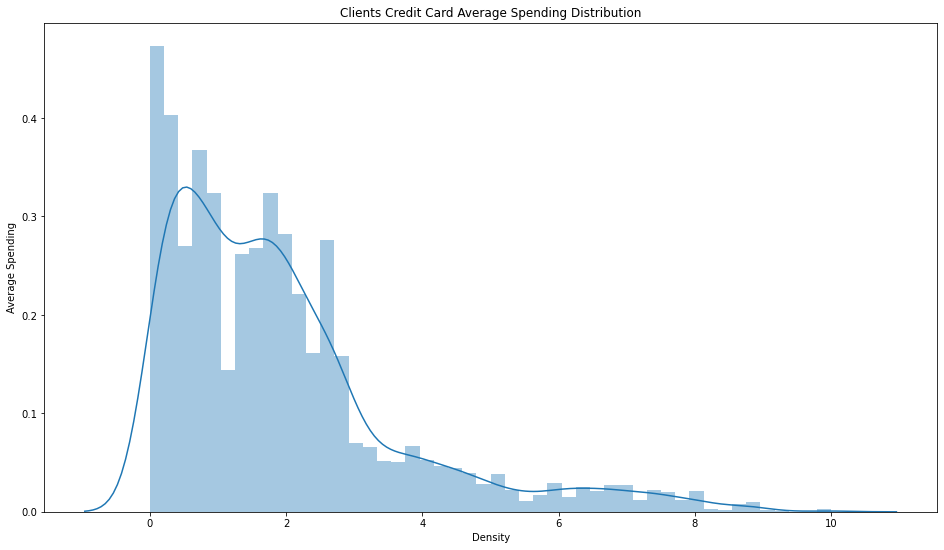

In [22]:
plt.figure(figsize = (16, 9))
sns.distplot(df['CCAvg'])
plt.title('Clients Credit Card Average Spending Distribution')
plt.xlabel('Density')
plt.ylabel('Average Spending');

So it seems that a lot of people fall here between between zero and maybe 2000 dollars and then it tapers off afterwards as you move forward to higher credit card average of 4000, 6000 and 8000 dollars.

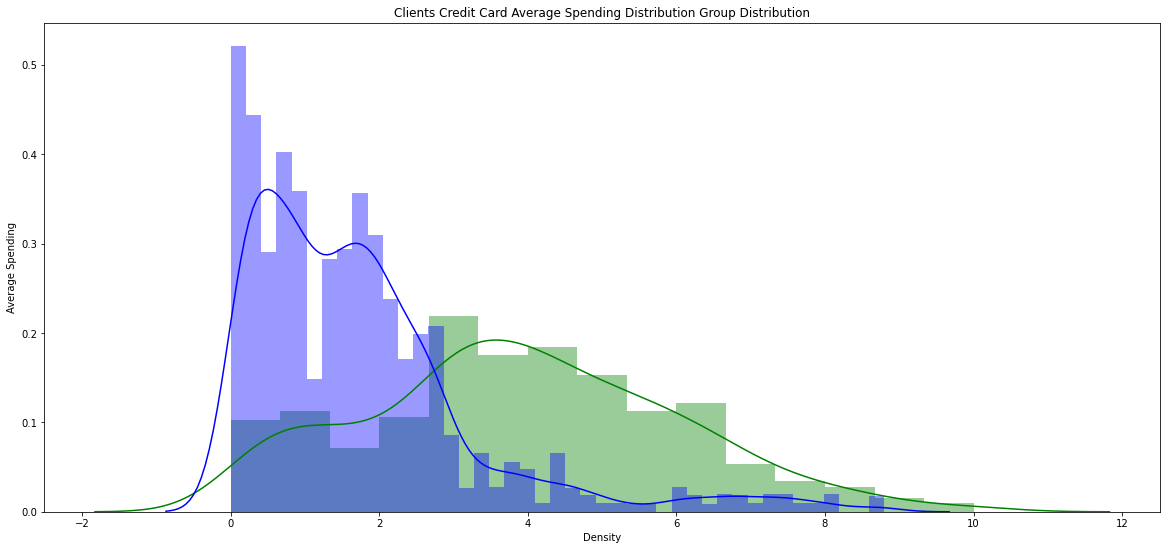

In [23]:
plt.figure(figsize = (20, 9))
sns.distplot(loans['CCAvg'], color = 'g')
sns.distplot(no_loans['CCAvg'], color = 'b')
plt.title('Clients Credit Card Average Spending Distribution Group Distribution')
plt.xlabel('Density')
plt.ylabel('Average Spending');

The plot above is consistent to the information that we obtained earlier, which indicates that the Green Group, which is the group that accepted the personal loan offer, tend to have higher average credit card spending compared to the other group who denied or declined the offer and did not accept, you know, like the bank personal loan offer, who tend to have lower credit card spending on average.

## Data Preprocessing

We need to prepare the data before training our deep learning model. Lets start by dividing the dataset into features and target variable and convert this last one onvert into essentially two outputs indicating the 2 classes. We also want to normalize our data so all the features that are being fed to the artificial neural networks will have equal weights, and that's really
important. And finally, we are going to take the entire data set and divide it into a training and testing set.

In [24]:
from sklearn import metrics
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [25]:
X = df.drop(columns=['Personal Loan'])
X

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0


In [26]:
y = df['Personal Loan']
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [27]:
y = to_categorical(y)
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [28]:
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4500, 13), (500, 13), (4500, 2), (500, 2))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 13), (1500, 13), (3500, 2), (1500, 2))

## Artificial Neural Networks

Our human brain consists off hundreds of billions off neurons that communicate with each other through electrical and chemical signals, and it helps us to see, think, talk essentially, as I speak right now, like there are neurons in my brain that are firing. That helps me kind of, you know, like like come up with ideas and communicate these ideas as well. And what we try to do here when it comes to artificial neural networks, we try to mimic our human brain with just using bunch of equations.

So as you guys can see here. This is essentially our biological neuron. So our biological neuron has a series of what we call it dendrites. And these dendrites collect information from neighboring neurons and then process the information inside the nucleus and then generates the output through what we call it the Exxon. Okay, And this is just a model of one single neuron, and there are hundreds of billions off these neurons everywhere, just communicating and firing with each other. And what we try to do when it comes to artificial neural networks is that we try to kind of mimic that mathematically.

### Multi Layer Neural Network Model

Now we are going to build the model to essentially perform the classifications task. We're going to train it using the gradient descent algorithm, and then we are going to test our model as well. We are going to build the model layer by layer being the first layer the input followed by the next hidden layer until we reach the output. Also lets get another model with an additional fully connected layer with 500 neurons and linear activation function.

In [31]:
NN_model = keras.Sequential()

NN_model.add(Dense(250, input_dim = 13, kernel_initializer = 'normal', activation = 'relu'))
NN_model.add(Dropout(0.3))
NN_model.add(Dense(500, activation = 'relu'))
NN_model.add(Dropout(0.3))
NN_model.add(Dense(500, activation = 'relu'))
NN_model.add(Dropout(0.3))
NN_model.add(Dense(500, activation = 'relu'))
NN_model.add(Dropout(0.4))
NN_model.add(Dense(250, activation = 'linear'))
NN_model.add(Dropout(0.4))
NN_model.add(Dense(2, activation = 'softmax'))
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 250)               3500      
_________________________________________________________________
dropout (Dropout)            (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               125500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               2

In [32]:
ANN_model = keras.Sequential()

ANN_model.add(Dense(250, input_dim = 13, kernel_initializer = 'normal',activation = 'relu'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500, activation = 'relu'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500, activation = 'relu'))
ANN_model.add(Dropout(0.4))
ANN_model.add(Dense(250, activation = 'linear'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(500, activation = 'linear'))
ANN_model.add(Dense(2, activation = 'softmax'))
ANN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 250)               3500      
_________________________________________________________________
dropout_5 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 500)               125500    
_________________________________________________________________
dropout_6 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropout_7 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 250)              

## Deep Learning Model Compile

Now that we have build our model, we are going to compile and train a deep neural network model by specifying the type of optimizer which will be Adam and also specify how many epochs do we need. We are interested primarily in accuracy metric, and that will be the primary metric getting an optimized upon and next we will fit our training data to the model.

In [33]:
NN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics= ['accuracy'])
history = NN_model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose= 1)

Epoch 1/20
88/88 [==============================] - 2s 20ms/step - loss: 0.2096 - accuracy: 0.9304 - val_loss: 0.0969 - val_accuracy: 0.9571
Epoch 2/20
88/88 [==============================] - 1s 13ms/step - loss: 0.1134 - accuracy: 0.9600 - val_loss: 0.0548 - val_accuracy: 0.9857
Epoch 3/20
88/88 [==============================] - 1s 13ms/step - loss: 0.0934 - accuracy: 0.9654 - val_loss: 0.0468 - val_accuracy: 0.9829
Epoch 4/20
88/88 [==============================] - 1s 12ms/step - loss: 0.0841 - accuracy: 0.9700 - val_loss: 0.0597 - val_accuracy: 0.9800
Epoch 5/20
88/88 [==============================] - 1s 12ms/step - loss: 0.0790 - accuracy: 0.9707 - val_loss: 0.0490 - val_accuracy: 0.9843
Epoch 6/20
88/88 [==============================] - 1s 15ms/step - loss: 0.0611 - accuracy: 0.9786 - val_loss: 0.0408 - val_accuracy: 0.9857
Epoch 7/20
88/88 [==============================] - 1s 15ms/step - loss: 0.0593 - accuracy: 0.9800 - val_loss: 0.0428 - val_accuracy: 0.9814
Epoch 8/20
88

Epoch 1/30
77/77 [==============================] - 1s 16ms/step - loss: 0.0296 - accuracy: 0.9865 - val_loss: 0.0563 - val_accuracy: 0.9857
Epoch 2/30
77/77 [==============================] - 1s 16ms/step - loss: 0.0345 - accuracy: 0.9861 - val_loss: 0.0330 - val_accuracy: 0.9895
Epoch 3/30
77/77 [==============================] - 1s 17ms/step - loss: 0.0313 - accuracy: 0.9882 - val_loss: 0.0429 - val_accuracy: 0.9838
Epoch 4/30
77/77 [==============================] - 1s 19ms/step - loss: 0.0310 - accuracy: 0.9869 - val_loss: 0.0300 - val_accuracy: 0.9895
Epoch 5/30
77/77 [==============================] - 1s 16ms/step - loss: 0.0259 - accuracy: 0.9865 - val_loss: 0.0401 - val_accuracy: 0.9848
Epoch 6/30
77/77 [==============================] - 1s 17ms/step - loss: 0.0183 - accuracy: 0.9922 - val_loss: 0.0606 - val_accuracy: 0.9867
Epoch 7/30
77/77 [==============================] - 1s 18ms/step - loss: 0.0370 - accuracy: 0.9886 - val_loss: 0.0447 - val_accuracy: 0.9867
Epoch 8/30
77

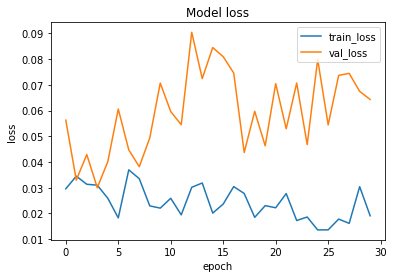

In [34]:
history = NN_model.fit(X_train, y_train, epochs = 30, validation_split = 0.3, verbose = 1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

### Model Performance

We the model already compiled lets take the it and apply the predict method. The testing data has never been seen by the model during training, that's a crucial part because we want to make sure that the model is able to generalize and not memorize.
We want to make sure that the model performs well even though it has never seen this data ever before, which is the testing data. So here are just gonna apply the predict method on my model, pass it along the testing data and regenerate predictions.
The output might be one or zero indicating whether the customer accepted the personal loan or not.

In [35]:
predictions = NN_model.predict(X_test)

predict = []
for i in predictions:
    predict.append(np.argmax(i))

In [37]:
result = NN_model.evaluate(X_test, y_test)

print("Accuracy : {}".format(result[1]))

47/47 [==============================] - 0s 4ms/step - loss: 0.1994 - accuracy: 0.9753
Accuracy : 0.9753333330154419


In [38]:
y_original = []

for i in y_test:
    y_original.append(np.argmax(i))

For the final step we are going to get a visual representation off my classifier performance. Basically, we'll compare the model predictions to what's actually happening in reality. The confusion matrix consist in the total number of samples that have been correctly classified with true positives and the true negatives.

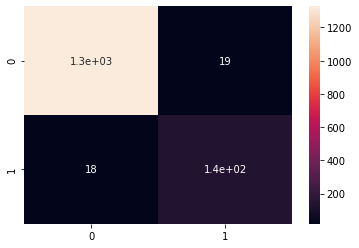

In [39]:
confusion_m = metrics.confusion_matrix(y_original, predict)
sns.heatmap(confusion_m, annot=True);

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_original, predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1346
           1       0.88      0.88      0.88       154

    accuracy                           0.98      1500
   macro avg       0.93      0.93      0.93      1500
weighted avg       0.98      0.98      0.98      1500



With a summary off all the information of our classifier we should be able to see the accuracy and performance of the model. As you can see, the overall accuracy of the model is around 97% which is pretty great, also you'll notice that the precision is around 99 and 88 for both classes and the recall is that at 98 and 88 which is also great.

## Conclusion

Bank loans play a crucial role in the development of banks investment business. Nowadays, there are many risk-related issues associated with bank loans. With the advent of computerization systems, banks have become able to register borrowers' data according their criteria. In fact, there is a tremendous amount of borrowers’ data, which makes the process of load management a challenging task. Many studies have utilized data mining algorithms for the purpose of loans classification in terms of repayment or when the loans are not based on customers’ financial history. This kind of algorithms can help banks in making grant decisions for their customers.

We have been able to build a classifier model based on artificial neural network that will be able to take in customer features such as their age, their experience, their income level, etc, to esentially tell us whether the customer will accept the personal loan or not. We were also able to perform data visualization and get good insigths about the data set. Furthermore now you understand how to prepare the data before model training, the intuition behind artificial neural networks, how do we train the model using the gradient descent algorithm and assess the performance of the training model.